In [ ]:
! pip install opendatasets --quiet

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#{"username":"rahaf8","key":"f59b8cb26f2973bc6fb4c52b1516ac19"}

dataset_url = 'https://www.kaggle.com/datasets/odins0n/ucf-crime-dataset'

# Specify the folder or file you want to download

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rahaf8
Your Kaggle Key: ··········


100%|██████████| 11.0G/11.0G [01:57<00:00, 100MB/s] 


In [ ]:
train_dir = "../content/ucf-crime-dataset/Train"
test_dir = "../content/ucf-crime-dataset/Test"


seed = 12
height = 64
width = 64
batch_size  = 64
num_class = 14

In [ ]:
labels = ['Abuse','Arrest','Arson','Assault','Burglary','Explosion','Fighting',"Normal",'RoadAccidents',
          'Robbery','Shooting','Shoplifting','Stealing','Vandalism']


In [ ]:
preprocess = tf.keras.applications.densenet.preprocess_input

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale = 1./255,
                                   preprocessing_function=preprocess
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  preprocessing_function=preprocess
                                 )

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (height ,width),
                                                    batch_size = batch_size,
                                                    shuffle  = True ,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    seed = seed
                                                   )
test_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                   target_size = (height ,width),
                                                    batch_size = batch_size,
                                                    shuffle  = False ,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    seed = seed
                                                  )

Found 1266345 images belonging to 14 classes.
Found 111308 images belonging to 14 classes.


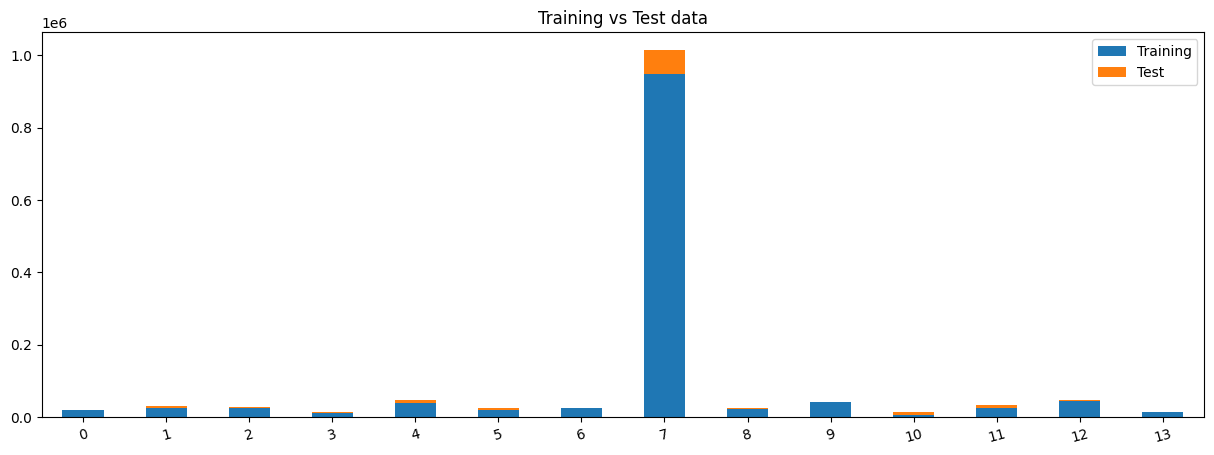

In [ ]:
ddata = {
    "Training": [list(train_generator.classes).count(i) for i in np.unique(train_generator.classes)],
    "Test": [list(test_generator.classes).count(i) for i in np.unique(test_generator.classes)]
}

ddataframe = pd.DataFrame(data=ddata)
ddataframe.plot.bar(stacked=True, rot=15, title='Training vs Test data', figsize=(15, 5))
plt.show(block=True)

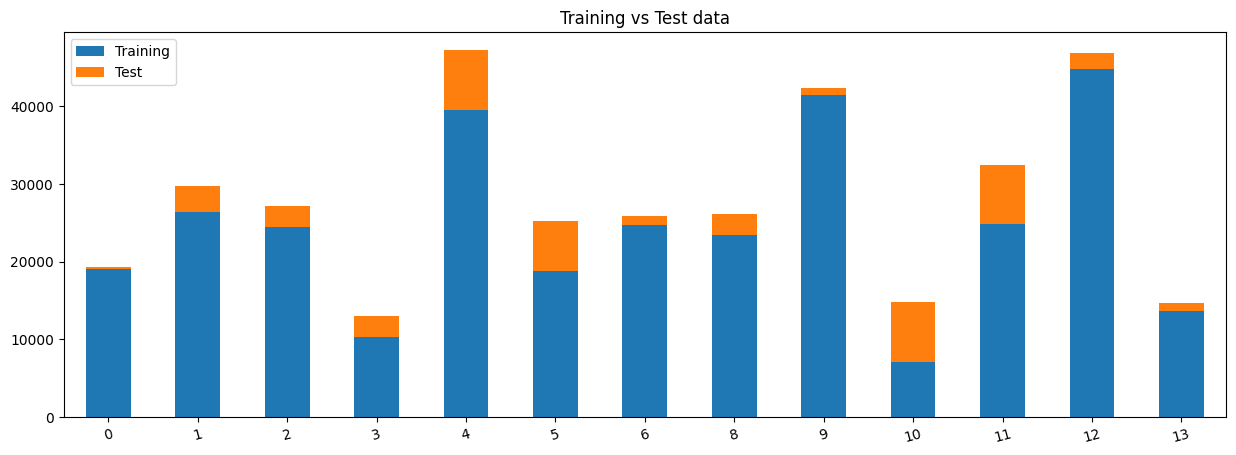

In [ ]:
class_number = 7

train_counts = [list(train_generator.classes).count(i) for i in np.unique(train_generator.classes) if i != class_number]
test_counts = [list(test_generator.classes).count(i) for i in np.unique(test_generator.classes) if i != class_number]

class_labels = [label for label in np.unique(train_generator.classes) if label != class_number]

ddata = {
    "Training": train_counts,
    "Test": test_counts
}

ddataframe = pd.DataFrame(data=ddata, index=class_labels)
ddataframe.plot.bar(stacked=True, rot=15, title='Training vs Test data', figsize=(15, 5))
plt.show(block=True)

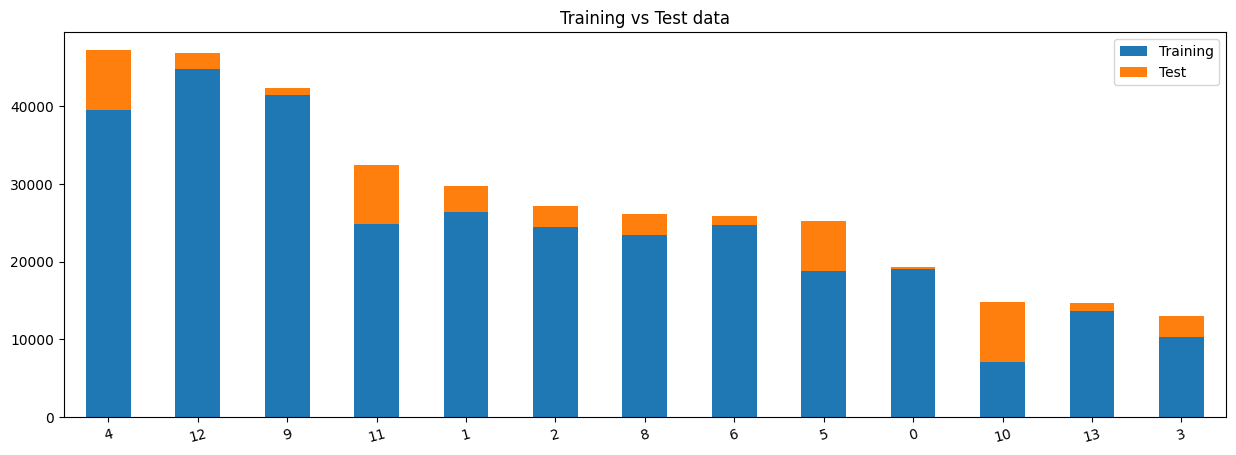

In [ ]:
class_number = 7

train_counts = [list(train_generator.classes).count(i) for i in np.unique(train_generator.classes) if i != class_number]
test_counts = [list(test_generator.classes).count(i) for i in np.unique(test_generator.classes) if i != class_number]

class_labels = [label for label in np.unique(train_generator.classes) if label != class_number]

ddata = {
    "Training": train_counts,
    "Test": test_counts
}

ddataframe = pd.DataFrame(data=ddata, index=class_labels)
ddataframe_sum = ddataframe.sum(axis=1)
ddataframe_sorted = ddataframe.loc[ddataframe_sum.sort_values(ascending=False).index]

ddataframe_sorted.plot.bar(stacked=True, rot=15, title='Training vs Test data', figsize=(15, 5))
plt.show(block=True)